In [1]:
import pandas

df = pandas.read_csv('Raw Data.csv')
df

,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Absolute acceleration (m/s^2)
0,-0.000141,0.081872,-0.055213,0.071132,0.121702
1,0.009856,-0.048625,-0.027615,0.068886,0.088726
2,0.019854,-0.070803,-0.004574,0.047379,0.085316
3,0.029852,0.035135,-0.004842,-0.069368,0.077909
4,0.039850,0.048807,-0.033459,-0.114005,0.128448
...,...,...,...,...,...
3235,32.342933,-0.031662,-0.012572,0.048071,0.058918
3236,32.352931,0.010792,0.022236,-0.049985,0.055762
3237,32.362929,-0.017933,0.043227,-0.274667,0.278625
3238,32.372927,-0.047209,0.001571,-0.312831,0.316377


<AxesSubplot:xlabel='Time (s)'>

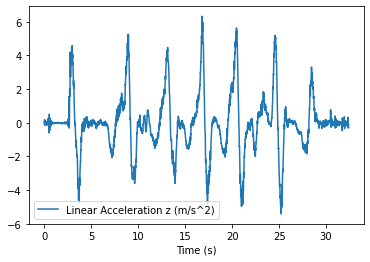

In [2]:
df.plot.line(x="Time (s)", y="Linear Acceleration z (m/s^2)")

## Calculating velocity and distance from z-axis acceleration and timesteps

Distance is (m):  19.952919557743094


[[],
 [-0.0001405833755, -9.999971482756945e-06],
 [0.009856416844, 0.0006786538614949305],
 [0.01985441684, 0.0011523472935674353],
 [0.02985241683, 0.0004588016022468997],
 [0.03985041683, -0.0006810195649177002],
 [0.04984841682, 0.0003266575733314209],
 [0.05984641681, 0.002145561312993153],
 [0.0698434168, 0.0026189209383167614],
 [0.07984141679, 0.0014189848787361384],
 [0.08983941679, 1.537841418453728e-05],
 [0.09983741678, -0.00024052056632535237],
 [0.1098354168, 0.00032649914878079433],
 [0.1198324168, 0.0009845636666818438],
 [0.1298304168, 0.0009137505089464839],
 [0.1398284168, 0.00048223630005228357],
 [0.1498264167, -2.400206635644e-05],
 [0.1598244167, -0.0001424663467608401],
 [0.1698224167, -0.0001501129752022255],
 [0.1798194167, -0.00037778785464150566],
 [0.1898174167, -0.000687873837638985],
 [0.1998154167, -0.0013496754987294053],
 [0.2098134167, -0.0015939057712037455],
 [0.2198114167, -0.0016211191163059734],
 [0.2298084167, -0.0015510904876790295],
 [0.239806

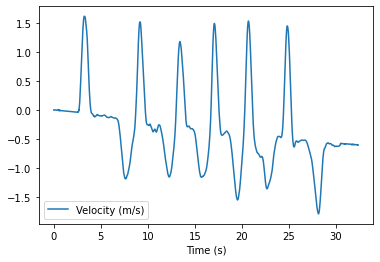

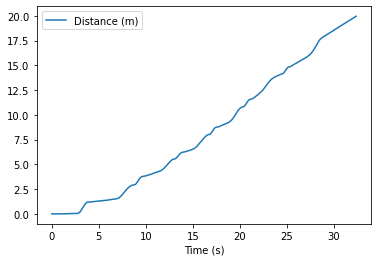

In [4]:
def get_velocity(acceleration, V0, delta_t):
    # a = (V1-V0) / t
    # V1 = a*t + V0
    return acceleration * delta_t + V0

def get_distance(delta_V, delta_t):
    # V = s/t
    # s = V*t
    return delta_V * delta_t

previous_time = 0.0
previous_velocity = 0.0
distance = 0.0
velocity_vec = [[]]
distance_vec = [[]]

for index, row in df.iterrows():
    timestep = row["Time (s)"] - previous_time
    velocity = get_velocity(row["Linear Acceleration z (m/s^2)"], previous_velocity, timestep)
    velocity_vec.append([row["Time (s)"], velocity])
    distance += abs(get_distance(velocity, timestep))
    distance_vec.append([row["Time (s)"], distance])
    previous_velocity = velocity
    previous_time = row["Time (s)"]

df_velocity = pandas.DataFrame(velocity_vec, columns=["Time (s)", "Velocity (m/s)"])
df_velocity.plot.line(x="Time (s)", y="Velocity (m/s)")
df_distance = pandas.DataFrame(distance_vec, columns=["Time (s)", "Distance (m)"])
df_distance.plot.line(x="Time (s)", y="Distance (m)")
print("Distance is (m): ", distance)
velocity_vec